# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [96]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import  seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [97]:
raw_data = pd.read_csv("C:/Users/ASUS/Desktop/Data Science/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S36_L249/Bank-data.csv")
raw_data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [98]:
data = raw_data.copy()
data = data.drop(['Unnamed: 0'],axis =1)
data['y'] = data['y'].map({'yes': 1, 'no': 0})
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [99]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [100]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()

result_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                  0.2121
Time:                        13:15:10   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

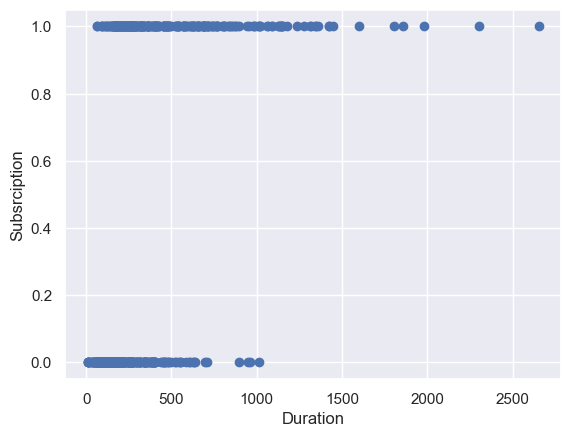

In [101]:
plt.scatter(x1,y)
plt.xlabel('Duration')
plt.ylabel('Subsrciption')

plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [102]:
data.columns.values

array(['interest_rate', 'credit', 'march', 'may', 'previous', 'duration',
       'y'], dtype=object)

In [103]:
y = data['y']
x1 = data.drop(['y','may'], axis = 1)
x1.head()

,interest_rate,credit,march,previous,duration
0,1.334,0.0,1.0,0.0,117.0
1,0.767,0.0,0.0,1.0,274.0
2,4.858,0.0,1.0,0.0,167.0
3,4.120,0.0,0.0,0.0,686.0
4,4.856,0.0,1.0,0.0,157.0


In [104]:
X = sm.add_constant(x1)
MultiVarRegLog = sm.Logit(y,X)
result_MultiVarlog = MultiVarRegLog.fit()

result_MultiVarlog.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Sun, 09 Jun 2024   Pseudo R-squ.:                  0.5143
Time:                        13:15:10   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
credit            2.3585      1.088      2.169      0.030       0.227       4.490
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [105]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [106]:
confusion_matrix(X,y,result_MultiVarlog)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [107]:
test = pd.read_csv("C:/Users/ASUS/Desktop/Data Science/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S36_L249/Bank-data-testing.csv")
test.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


In [108]:
test = test.drop(['Unnamed: 0'],axis =1)
test['y'] = test['y'].map({'yes': 1, 'no': 0})
test.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

In [121]:
y_test = test['y']
x_test = test.drop(['y','may'], axis = 1)
x_test.head()


,interest_rate,credit,march,previous,duration
0,1.313,0.0,1.0,0.0,487.0
1,4.961,0.0,0.0,0.0,132.0
2,4.856,0.0,1.0,0.0,92.0
3,4.120,0.0,0.0,0.0,1468.0
4,4.963,0.0,0.0,0.0,36.0


In [122]:
X.head()

,const,interest_rate,credit,march,previous,duration
0,1.0,1.334,0.0,1.0,0.0,117.0
1,1.0,0.767,0.0,0.0,1.0,274.0
2,1.0,4.858,0.0,1.0,0.0,167.0
3,1.0,4.120,0.0,0.0,0.0,686.0
4,1.0,4.856,0.0,1.0,0.0,157.0


In [123]:
x_test = sm.add_constant(test_data)
x_test


,const,interest_rate,credit,march,previous,duration
0,1.0,1.313,0.0,1.0,0.0,487.0
1,1.0,4.961,0.0,0.0,0.0,132.0
2,1.0,4.856,0.0,1.0,0.0,92.0
3,1.0,4.120,0.0,0.0,0.0,1468.0
4,1.0,4.963,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...
217,1.0,4.963,0.0,0.0,0.0,458.0
218,1.0,1.264,0.0,1.0,0.0,397.0
219,1.0,1.281,0.0,1.0,0.0,34.0
220,1.0,0.739,0.0,0.0,0.0,233.0


Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [124]:
cm = confusion_matrix(x_test,y_test,result_MultiVarlog)
cm

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

In [115]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,93.0,18.0
Actual 1,13.0,98.0


In [120]:
Missclass = (18+ 13)/(93+98+18+13)
Missclass

0.13963963963963963

In [125]:
confusion_matrix(X,y,result_MultiVarlog)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

In [126]:
Missclass = (41+30)/(41+30+218+229)
Missclass

0.13706563706563707

The value is close means